In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [100]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


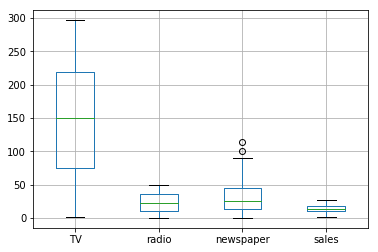

In [3]:
data.boxplot()

In [4]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
Y = data['sales']

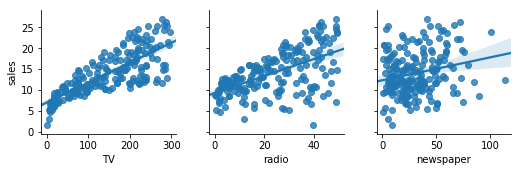

In [102]:
import seaborn as sns
sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",kind='reg') # kind='scat'
# every indep. var should have linear relationship with dep. var aka assumptn of linearity

In [ ]:
# the dep var should followe an approx. ND (aka assumption of normality)

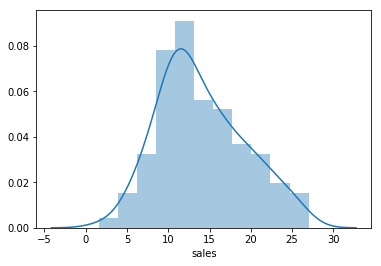

In [5]:
import seaborn as sns
sns.distplot(Y,hist=True)  # auto scales values

In [ ]:
# if assmptn of normality is not met, then perform the folowing to smoothen the peaks

In [ ]:
"""
# Log transformation
import numpy as np
Y_log  = np.log(Y)
"""

In [ ]:
#sns.distplot(Y_log,hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021322A3BF28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021322BDAA20>]], dtype=object)

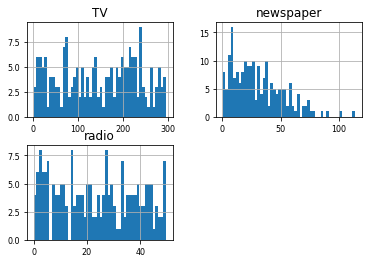

In [104]:
X.hist(bins=50, xlabelsize=8, ylabelsize=8)

In [17]:
import numpy as np
from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75) ]

# apply log + 1 transformation for all numeric features with skewnes over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])  # log1p adds 1 to each value then do the log transformation
# apply this logic only once not matter the after results

In [18]:
data_num_skew # # high skewness value for newspaper

TV          -0.069328
radio        0.093467
newspaper   -0.793863
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9DB70FDC8>,
      dtype=object)

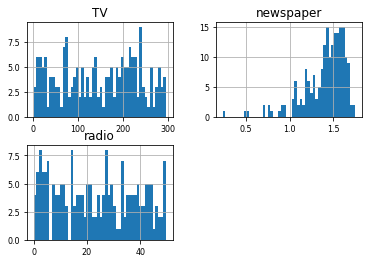

In [19]:
X.hist(bins=50, xlabelsize=8, ylabelsize=8)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.018988
radio      0.054809  1.000000   0.207854
newspaper  0.018988  0.207854   1.000000


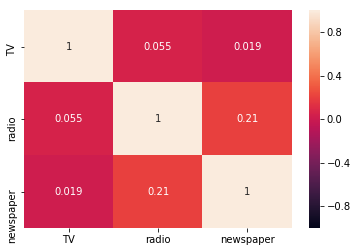

In [20]:
# no multicollinearity should exist within the data
import seaborn as sns

corr_df=X.corr(method="pearson")  # heatmap, VIF and corr technq can be used to find correlation
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.68
1,radio,3.62
2,newspaper,5.94


In [22]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)  

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)


3.389916860805249
[ 0.04373044  0.19280591 -0.13167018]


In [24]:
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

[('TV', 0.0437304410240576), ('radio', 0.19280590870838593), ('newspaper', -0.13167018358584662)]


In [26]:
# quick checking the results
X1=50
X2=50
X3=50
y_pred=3.389916860805249+(0.04373044 *X1)+(0.192805919*X2)+(-0.131670182*X3)
print(y_pred)

8.633225710805249


In [27]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.13321476 12.97823205 18.06954965 23.67244476 20.68931733 14.25691472
 14.92704861 21.39771063 21.14160115 12.77346296 24.00358878  7.20897656
 12.33001346 19.23096474 19.43359699 13.43327126 19.60624633  9.23209635
 21.09765969 20.86684022 15.51146029 10.89955507 22.83705331 15.84268305
 17.40445053  8.18562163 11.87036626 12.70581122 21.70073874  7.9435577
 12.49670252 20.43130025  4.71593916  4.73100513 16.73761425 15.74441253
  6.73900399 17.72150445  9.02030035 13.60076813]


In [28]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
print(new_df)

        TV  radio  newspaper  Actual sales  Predicted sales
60   210.7   29.5   1.203616          18.4        18.133215
6      8.7   48.9   1.673489           7.2        12.978232
21   218.4   27.7   1.608710          18.0        18.069550
199  283.6   42.0   1.650133          25.5        23.672445
53   216.4   41.7   1.548364          22.6        20.689317
20   147.3   23.9   1.386474          14.6        14.256915
163  188.4   18.1   1.454166          14.9        14.927049
56   198.9   49.4   1.631370          23.7        21.397711
70   216.8   43.9   1.467718          22.3        21.141601
3     17.2   45.9   1.658756           9.3        12.773463
99   289.7   42.3   1.600414          25.4        24.003589
11    66.1    5.8   1.441456           8.6         7.208977
76    16.9   43.7   1.705519           8.7        12.330013
143  220.5   33.2   1.539229          20.1        19.230965
125  229.5   32.3   1.671502          19.7        19.433597
64   102.7   29.6   1.175792          14

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2score=r2_score(Y_test,Y_pred)
print(r2score)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
# compare rmse value with individual y value
# rmse is a useful metric when comparing rmse of multiple models

0.8349807940441376
2.591566060001399


In [31]:
# to check where our rmse lies
print(min(Y_test))
print(max(Y_test))
# conclusion - rmse value is close to min value which is good

1.6
25.5


In [32]:
# adj Rsqrd
adjusted_r_squared = 1 - (1-r2score)*(len(Y_test)-1)/(len(Y_test)-X.shape[1]-1)
print(adjusted_r_squared)

0.8212291935478158


In [36]:
data=pd.DataFrame()
data = X_train
data['sales'] = Y_train
data.head()

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TV,radio,newspaper,sales
191,39.5,41.1,1.070529,10.8
8,120.2,19.6,1.262345,13.2
27,142.9,29.3,1.283727,15.0
139,43.0,25.9,1.403164,9.6
59,210.8,49.6,1.538122,23.8


In [37]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.389917
TV           0.043730
radio        0.192806
newspaper   -0.131670
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.1
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           1.13e-85
Time:                        14:29:52   Log-Likelihood:                -276.66
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [39]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2score=r2_score(Y_test,Y_pred_new)
print(r2score)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

# adj Rsqrd
adjusted_r_squared = 1 - (1-r2score)*(len(Y_test)-1)/(len(Y_test)-X.shape[1]-1)
print(adjusted_r_squared)

0.8349807940441384
2.5915660600013934
0.8212291935478165


In [42]:
import statsmodels.formula.api as sm

# create a fitted model with two features
lm_model = sm.ols(formula='sales ~ TV + radio ', data=data).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           3.47e-87
Time:                        14:44:13   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [43]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2score=r2_score(Y_test,Y_pred_new)
print(r2score)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

# adj Rsqrd
adjusted_r_squared = 1 - (1-r2score)*(len(Y_test)-1)/(len(Y_test)-X.shape[1]-1)
print(adjusted_r_squared)

0.8354496662944217
2.587881707737811
0.8217371384856236


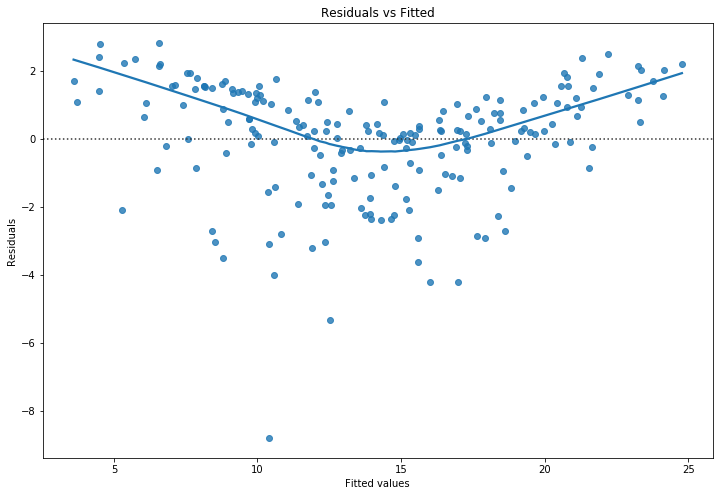

In [119]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=data, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
# errors should be random checked with res vs fit plot
# the plotline must not be repetitive or cyclic

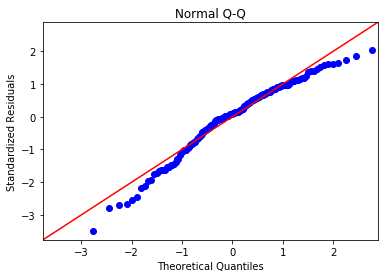

In [45]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, stats.t, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals');
plt.show() 
# errors should follow an approx ND
# checked using qq plot

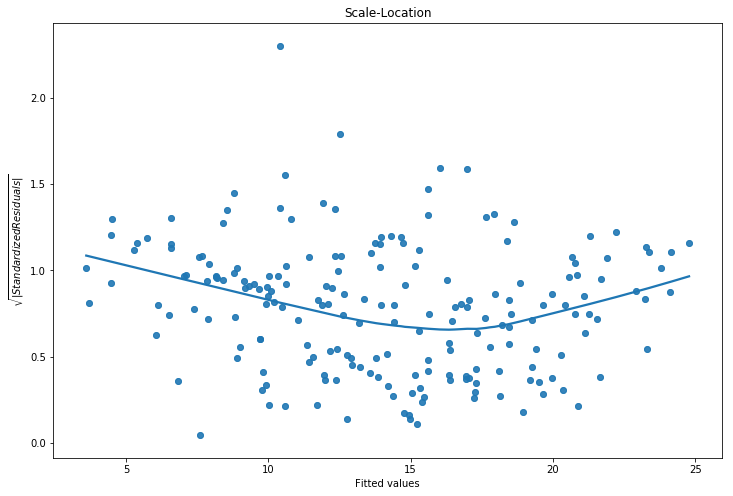

In [121]:
# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
# errors should follow a constant variance (Homoscedasticity)